In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
# Data Exploration
print("Data Exploration:")
print(df.info())
print(df.describe())

Data Exploration:
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        712 non-null    object 
 11  Embarked     712 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 72.3+ KB
None
       PassengerId    Survived      Pclass         Sex         Age  \
count   712.000000  712.000000  712.000000  712.000000  712.000000   
mean    448.589888    0.404494    2.240169    0.363764   29.642093   
std     258.6831

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Handle missing values
df.dropna(subset=['Age', 'Embarked'], inplace=True)
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [6]:
# Convert categorical variables into numerical representations
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [7]:
# Feature Engineering
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [14]:
# Model Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.7832167832167832

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        80
           1       0.77      0.73      0.75        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143


Confusion Matrix:
[[66 14]
 [17 46]]


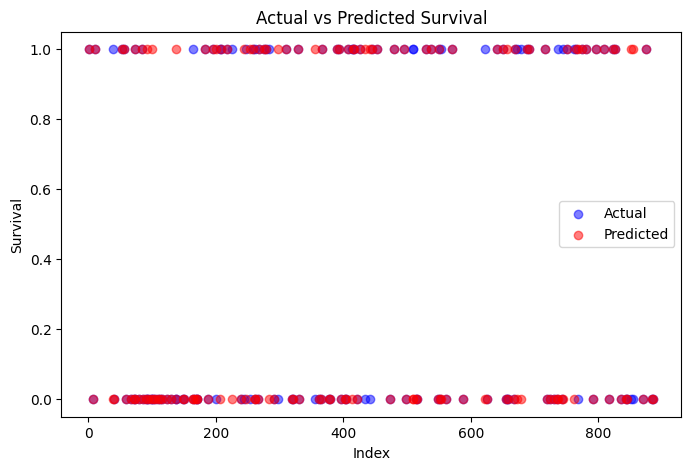

In [18]:
import numpy as np

# Create a DataFrame for actual and predicted values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted outcomes
plt.figure(figsize=(8, 5))
plt.scatter(predictions_df.index, predictions_df['Actual'], color='blue', label='Actual', alpha=0.5)
plt.scatter(predictions_df.index, predictions_df['Predicted'], color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Survival')
plt.title('Actual vs Predicted Survival')
plt.legend()
plt.show()

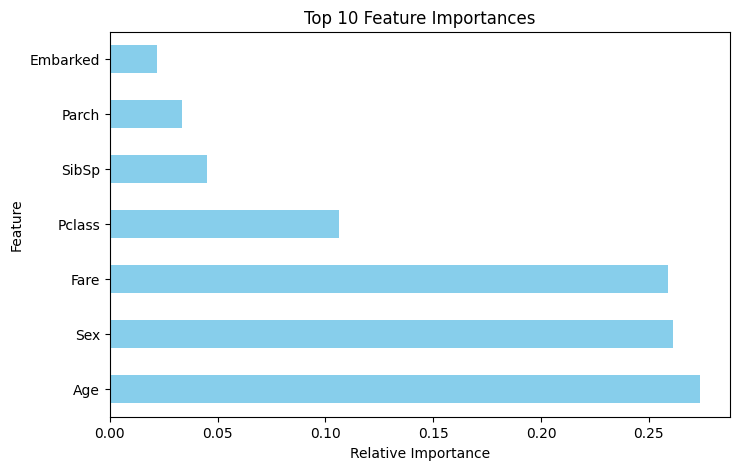

In [20]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(8, 5))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()